# Seaborn Lecture Note $-$ Part 3
___

See [seaborn homepage](https://seaborn.pydata.org/introduction.html) for more detailed information and [documentation](https://seaborn.pydata.org/api.html), or visit their [Github page here](https://github.com/mwaskom/seaborn).
<br><br>
Tutorial page for seaborn:
https://seaborn.pydata.org/tutorial.html
___

This part covers **Matrix Plots**

___
## 3. Matrix Plots

We mainly focused on seeing the distribution of categorical columns such as gender, day/time, or any other categorical column in our dataframe.

In [1]:
import seaborn as sns
%matplotlib inline

# Load two datasets
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### 3.1. Heat Maps

`sns.heatmap()`

Heatmap is our primary way of showing some sort of matrix plot.

In order for `heatmap()` to work properly, **our data should already be in a matrix form**, i.e. the index name and column name match up so that the cell value actually indicates something that is relevant to both of them.

For example, our **tips** dataframe above doesn't have an actual row variable. For that, we need to make **tips** dataframe to have both variables on the columns and rows. There are many methods for that, for example: get correlation data or pivotting the table.

#### Get Correlation Data

`dataframe.corr()`

With this function, we'll get a matrix that indicates a relevancy to both the column and index name for the cell where they match up.

We're going to need this in order to call heat map on it,

In [4]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


then simply pass it into `heatmap()` function,

<AxesSubplot:>

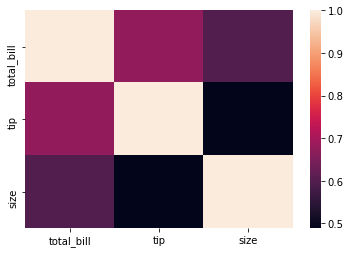

In [5]:
sns.heatmap(tips.corr())

Of course, we can always put `corr()` into variable too:

<AxesSubplot:>

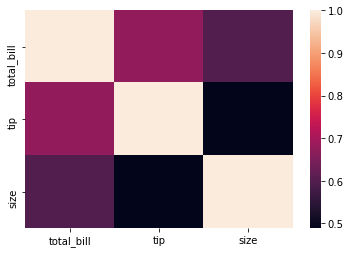

In [6]:
tc = tips.corr()
sns.heatmap(tc)

There we have our heatmap. It colors in those values based on some sort of gradient scale.

In [7]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In short, if we have a very large correlation dataframe or some other matrix form data, we can easily tell what numbers/values are relative to each other using this heatmap technique. And that's the primary use of a matrix plot.

Some useful arguments we can pass to `sns.heatmap()`:

`annot` $-$ generate annotation of the actual numerical values that belong to each of the cells.

<AxesSubplot:>

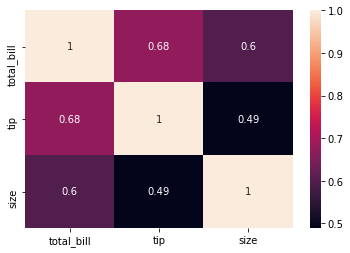

In [8]:
sns.heatmap(tc,annot=True)

`cmap` $-$ set the desired color map of the heatmap with predefined matplotlib-formatted colormaps.

<AxesSubplot:>

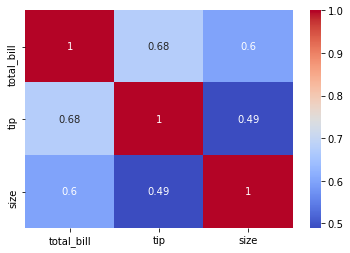

In [9]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

#### Pivot Table

`dataframe.pivot_table(index,columns,values)`

With this function, we'll get a matrix that indicates a relevancy to both the column and index name for the cell where they match up.

Let's head back to the **flights** data,

In [10]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


Get those data above into matrix form by converting one of those variables to be the column or the row names,i.e. the actual index, by pivoting the table.

For example, let's use **month** to be the index and **year** as the column.

`dataframe.pivot_table(index,columns,values)`

`values` $-$ the observed column value

In [11]:
flights.pivot_table(index='month',columns='year',values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


Now we have our flights data in matrix form. We can use heatmap to visualize these data:

<AxesSubplot:xlabel='year', ylabel='month'>

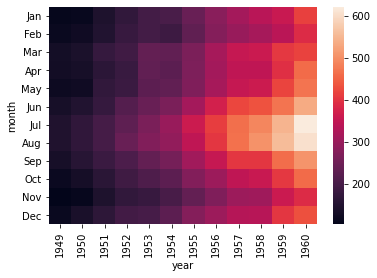

In [12]:
# assigning the same cell above to fp
fp = flights.pivot_table(index='month',columns='year',values='passengers')

sns.heatmap(fp)

We can always change the colormap using `cmap`:

<AxesSubplot:xlabel='year', ylabel='month'>

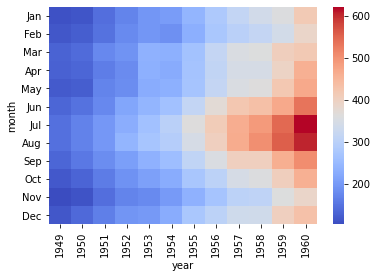

In [14]:
sns.heatmap(fp,cmap='coolwarm')

or we can also pass `linecolor` and `linewidths` arguments which sometimes people like to use.

`linecolor` $-$ specify the line color that separates the cells<br>
`linewidths` $-$ specify the line thickness

<AxesSubplot:xlabel='year', ylabel='month'>

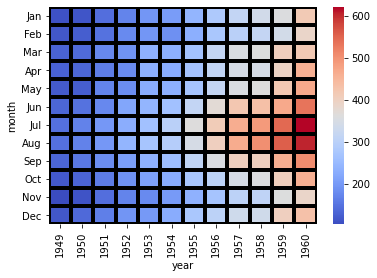

In [18]:
sns.heatmap(fp,cmap='coolwarm',linecolor='black',linewidths=3)

### 3.2. Cluster Map

`sns.clustermap()`

Cluster map is using hierarchical clustering to produce a clustered version of the heat map.

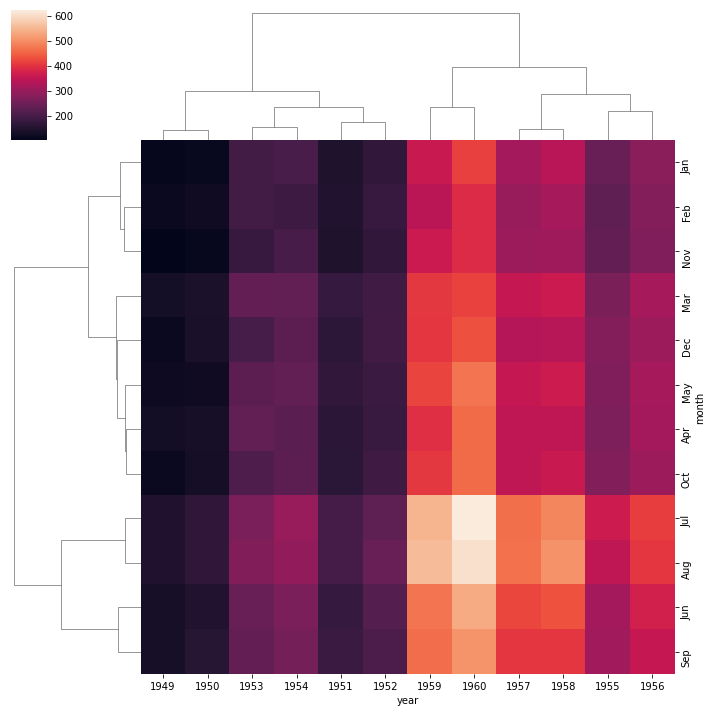

In [19]:
sns.clustermap(fp)

Now we have the hierarchical clusters. They basically try to clusters column and rows together based on their similarity. In this example, x-axis shows the years and y-axis shows the months.

Notice that the months in y-axis are now not in the *correct* order. The reason is because they've been clustered to most similar months being put together. The same thing also goes for x-axis where the years are not in order as well.

So, cluster map basically tries to show columns and rows that are similar to each other. For example, we can see now that 1959 and 1960 are very similar to each other, or so are November and February. Also notice that the cluster of Nov-Feb is also similar to January but in a different *similarity level*, hence hierarchical cluster.

Now we can begin to infer information from the plot. Some ways we can do are changing the colormapping `cmap` or standardize the scale with `standard_scale` argument:

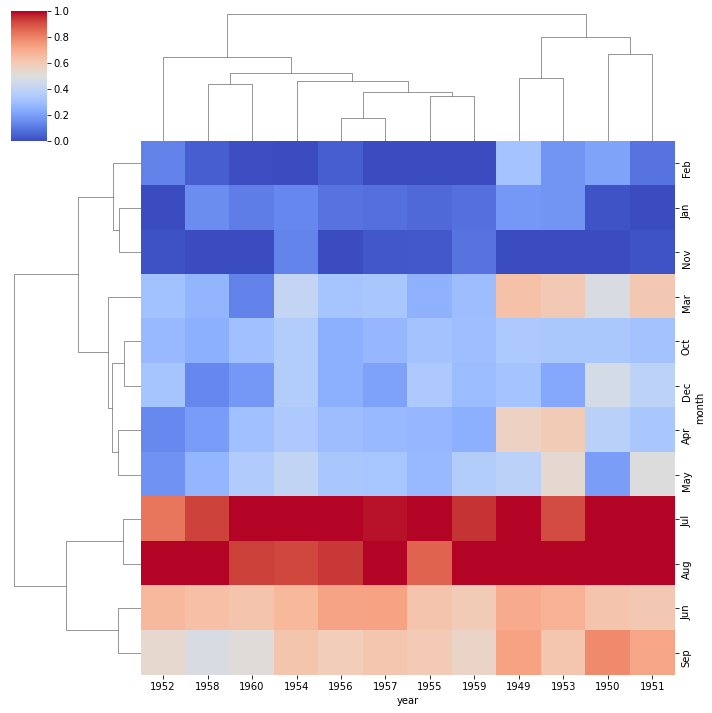

In [21]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

This cluster map technique is correlated with Machine Learning clustering algorithms, and we may need to wait until we learn about it so that we can better understand the math behind this method.

## *Part 3 Finished!*

Continue to >> [note part 4: Grids](./05-seaborn-note-4.ipynb)